In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
from RobotSim373 import *

Version:  0.0.14


In [4]:
def build(robot):    
    
    left=Box(robot,2,12,width=1,height=1,name='left')
    right=Box(robot,2,10,width=1,height=1,name='right')
    
    connect(left,right,'weld')  # revolves around the middle of the second object
    
    robot.current_force=0
    robot.current_force_angle=0
    robot.time_to_next_decision=0
    
    

In [5]:
def act(t,robot):
    
    if t>=robot.time_to_next_decision:  # new force
        robot.current_force=random.rand()*10
        robot.current_force_angle=random.rand()*360
        robot.time_to_next_decision=t+2.0  

    robot['left'].F=robot.current_force
    robot['right'].F=robot.current_force
    robot['left'].F_angle=robot.current_force_angle
    robot['right'].F_angle=robot.current_force_angle
    
        

Want a robot to randomly walk around.

1. pick a random point
2. move to that point
3. when you get there, repeat at step 1




1. pick a random force (magnitude and direction)
2. change the force at different times

1. choose a random force, and direction  - save to the robot (robot.current_force, etc...)
2. set the time to the next decision
3. if t < time to the next decision:
    - assign the current_force
4. otherwise (t>time to the next decision:
    - repeat 1.

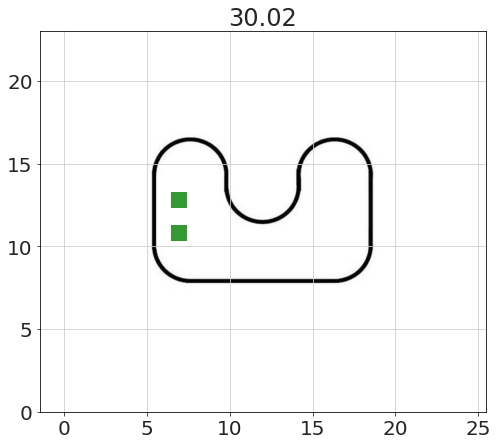

In [6]:
env=Environment(image='images/linepath1.jpeg',linearDamping=10) 
robot=Robot(env)

build(robot)

run_sim(env,act,
        total_time=30,  # seconds
        dt=1/60,
        dt_display=.5,  # make this larger for a faster display
        figure_width=8,
        plot_orientation=False,
       )

# take picture

In [12]:
def act(t,robot):
    
    if t>=robot.time_to_next_decision:  # new force
        robot.current_force=random.rand()*30
        robot.current_force_angle=random.rand()*360
        robot.time_to_next_decision=t+2.0  
        robot.take_picture('test %.1f.jpg' % t)

    robot['left'].F=robot.current_force
    robot['right'].F=robot.current_force
    robot['left'].F_angle=robot.current_force_angle
    robot['right'].F_angle=robot.current_force_angle
    
        

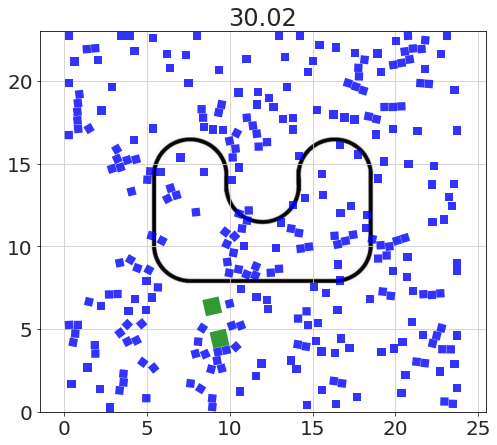

In [13]:
env=Environment(image='images/linepath1.jpeg',linearDamping=10) 
robot=Robot(env)

build(robot)

for i in range(300):
    b=Box(env,x=rand()*24,y=rand()*24,
          width=0.5,height=0.5)


run_sim(env,act,
        total_time=30,  # seconds
        dt=1/60,
        dt_display=.5,  # make this larger for a faster display
        figure_width=8,
        plot_orientation=False,
       )

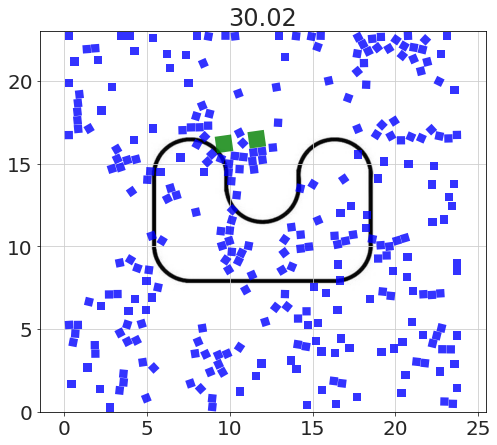

In [14]:
robot.time_to_next_decision=0
run_sim(env,act,
        total_time=30,  # seconds
        dt=1/60,
        dt_display=.5,  # make this larger for a faster display
        figure_width=8,
        plot_orientation=False,
       )

# Outline for Robot Game Playing

1. **Look at the board (take a picture of the current set-up)**
2. image to state conversion
    - look at colors
    - slice the image up into section
4. **have the agent determine the move (state,player) -- from valid_moves.**  
    - e.g. random, minimax, etc...
5. move is a number, or a pair of numbers.   move to motion conversion.
    - locations of the piece
    - robot needs to get where it is, where to go
6. **execute that motion**
7. go to a start position.  wait for the other player.

In [ ]:
def read_state():
    return state

def make_move(state,player,move):
    
    # generates the motion commands for the robot



In [16]:
colors=['r','b','c','m','y']
env=Environment(image='images/linepath1.jpeg',linearDamping=10) 
robot=Robot(env)

build(robot)

for i in range(300):
    b=Box(env,x=rand()*24,y=rand()*24,
          width=0.5,height=0.5,color=random.choice(colors))


run_sim(env,act,
        total_time=30,  # seconds
        dt=1/60,
        dt_display=.5,  # make this larger for a faster display
        figure_width=8,
        plot_orientation=False,
       )

TypeError: __init__() got an unexpected keyword argument 'color'

In [15]:
plot?

Signature: plot(*args, scalex=True, scaley=True, data=None, **kwargs)
Docstring:
Plot y versus x as lines and/or markers.

Call signatures::

    plot([x], y, [fmt], *, data=None, **kwargs)
    plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)

The coordinates of the points or line nodes are given by *x*, *y*.

The optional parameter *fmt* is a convenient way for defining basic
formatting like color, marker and linestyle. It's a shortcut string
notation described in the *Notes* section below.

>>> plot(x, y)        # plot x and y using default line style and color
>>> plot(x, y, 'bo')  # plot x and y using blue circle markers
>>> plot(y)           # plot y using x as index array 0..N-1
>>> plot(y, 'r+')     # ditto, but with red plusses

You can use `.Line2D` properties as keyword arguments for more
control on the appearance. Line properties and *fmt* can be mixed.
The following two calls yield identical results:

>>> plot(x, y, 'go--', linewidth=2, markersize=12)
>>> plot(x, y, col